# Experiment Results
## Experiment picker

Use the widget below to select and load experiments from `data/`.

**Mode Selection:**
- **Single Experiment** (default): Select one experiment and automatically load all its configurations. Uses a radio button for experiment selection.
- **Multiple Experiments**: Select multiple experiments and customize which configurations to load for each. Uses checkboxes for selection.

**Configuration Handling:**
- If an experiment contains configuration subfolders (for example `data/exp/<cfg>/001`), it will be treated as a multi-config experiment and config pickers will be shown.
- If the experiment has `001` directly under `data/exp/001`, it will be treated as a single-run experiment and no config picker will be shown.

After selecting experiments and configurations, click **Choose experiment(s)** to load the data. The results will be printed and saved to `picker.last_loaded`, and a CSV picker will automatically appear to select which data files to load.

> Tip: If the widgets do not show or importing `plothelpers2` raises an error, install the widget dependency with:
> ```bash
> pip install ipywidgets
> ```


In [4]:
# EXP picker
from pathlib import Path
import plothelpers2 as ph

# create and show the picker (data folder is relative to this notebook)
DATA_DIR = Path('data')
picker = ph.create_and_show_picker(DATA_DIR)

# Wrap the original load button callback to also show CSV picker after loading
original_callback = picker.load_button._click_handlers.callbacks[0] if picker.load_button._click_handlers.callbacks else None

def enhanced_load_callback(btn):
    # Call original callback
    if original_callback:
        original_callback(btn)
    
    # After experiments are loaded, automatically show CSV picker
    if picker.last_loaded:
        get_selections = ph.create_csv_picker_for_loaded_paths(picker, DATA_DIR)
        globals()['get_selections'] = get_selections

# Replace the callback
picker.load_button._click_handlers.callbacks = []
picker.load_button.on_click(enhanced_load_callback)

Button(description='Load data', style=ButtonStyle())

Output()

## Data Preview

In [5]:
# Preview helper: choose experiment & see a combined preview (no csv_basename key anymore)
ph.show_loaded_preview()


No `loaded_data` available. Use the picker and click Load data first.


## Block Production Summary
Shows the number of blocks produced by each robot (from monitor.log files).

In [ ]:
# Show block production counts from monitor.log files
ph.show_block_production_summary()

# You can also access the data using helper functions:
# ph.get_block_production_count(experiment, rep, robot)
# Examples:
#   ph.get_block_production_count('ProofOfWork_5', '1', 2)  # Get count for robot 2 in rep 1
#   ph.get_block_production_count('ProofOfWork_5', '1')     # Get all robots in rep 1
#   ph.get_block_production_count('ProofOfWork_5')          # Get all reps

# Or access the raw dict directly:
# block_production_counts[experiment][rep][robot] -> count

### Interactive Block Production Picker
Filter by experiment, rep, and robot using the same picker UI.
import plothelpers2 as ph
ph.show_block_production_picker()

In [ ]:
import plothelpers2 as ph
ph.show_block_production_picker()

### Custom Histogram Examples
You can now customize bins, labels, and title:
```python
# Custom bins
ph.show_histogram('TELAPSED', bins=200)

# Custom labels and title
ph.show_histogram('TELAPSED', bins=50, xlabel='Time [seconds]', title='Custom Title')

# Only change some parameters (others use defaults)
ph.show_histogram('TELAPSED', xlabel='Block Delay', title='My Analysis')
```


## Time elapsed between blocks (histogram)

In [2]:
# TELAPSED histogram
ph.show_histogram('TELAPSED',xlabel='time',title='Time elapsed between blocks')


NameError: name 'ph' is not defined

## Time elapsed between block production to reception

In [ ]:
# TPROD histogram - time between block productions
ph.show_histogram('TIMESTAMP', 'HASH',xlabel='time',title='Time between block productions')


## Block propegation time (BPT)

In [ ]:
# Block propagation time boxplot
ph.show_block_propagation_boxplot()


## Block production efficency (BPE)
Shows chain efficiency as a percentage: max(HEIGHT) / total_produced_blocks × 100. This represents what percentage of produced blocks ended up in the longest chain.agents.

/home/dodo/toychain-argos/BachelorProjekt/results/plothelpers2.py:1778: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


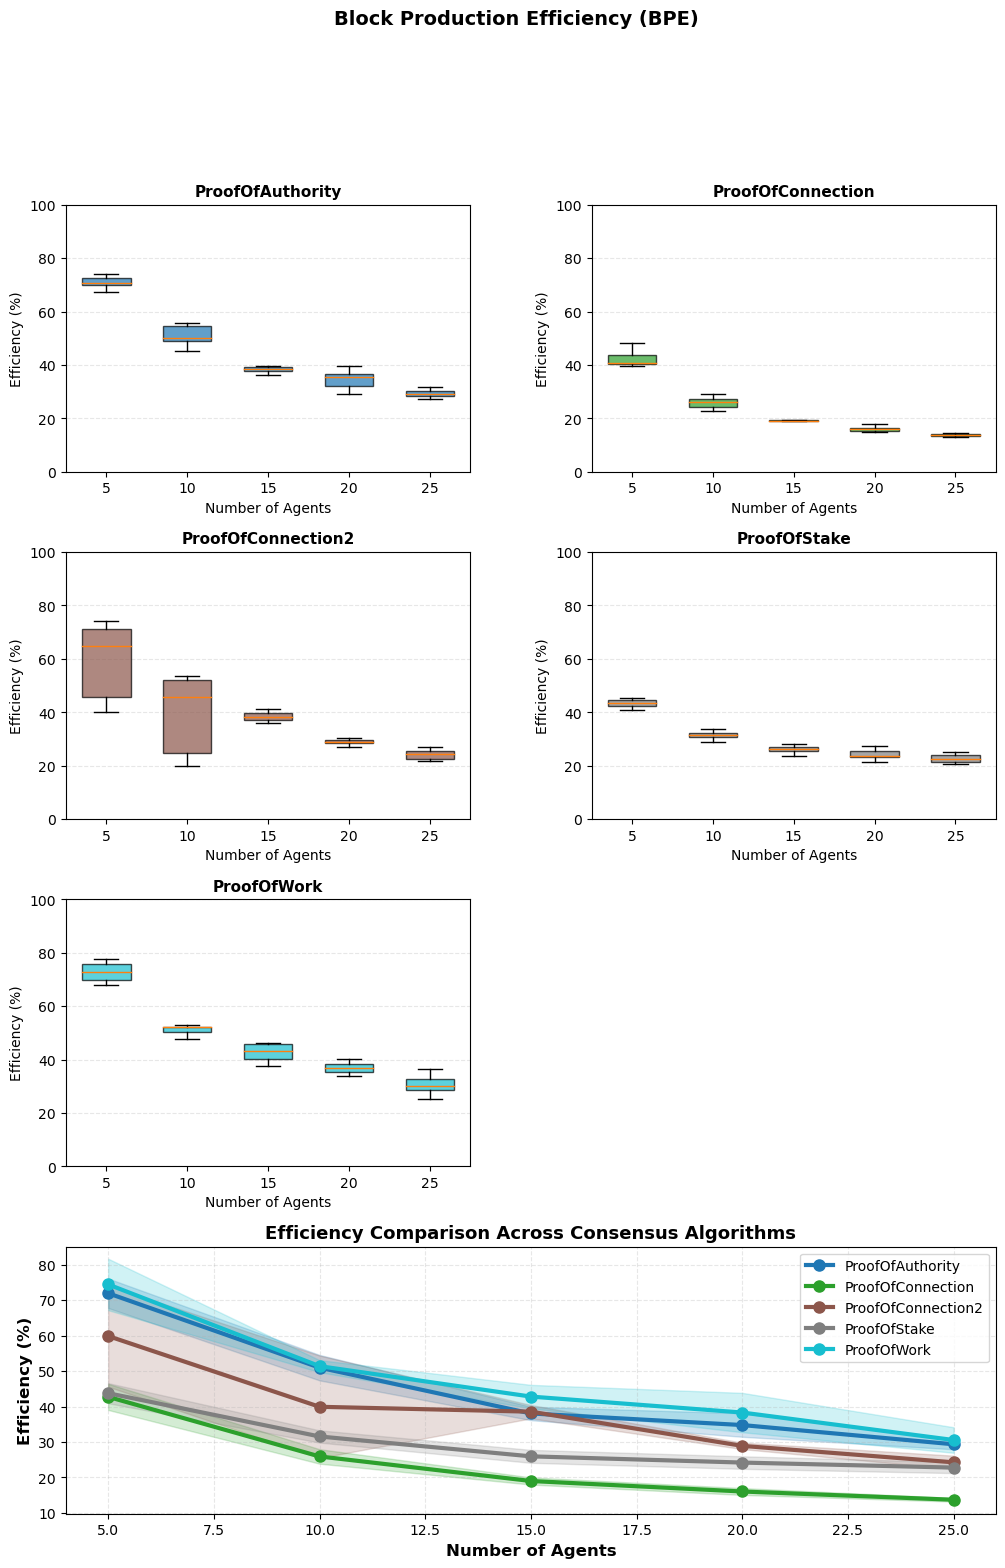


Summary Statistics (Efficiency (%)):
                               count       mean     median        std        min        max
consensus          num_agents                                                              
ProofOfAuthority   5              10  71.931486  70.794118   4.152057  67.346939  82.352941
                   10             10  50.960090  50.000000   3.585442  45.360825  55.555556
                   15             10  38.050458  38.651515   1.890183  33.695652  39.784946
                   20             10  34.782461  35.533911   3.307022  29.292929  39.759036
                   25             10  29.359783  29.006410   1.412801  27.272727  31.623932
ProofOfConnection  5              10  42.725482  40.885429   3.681793  39.735099  50.144928
                   10             10  25.933019  26.150513   2.040009  22.781065  28.981481
                   15             10  19.012870  19.225552   1.004614  16.702820  20.174346
                   20             10  16.0

In [6]:
# Efficiency boxplot (% main-chain blocks)
ph.show_efficiency_boxplot()


## Block Reception Distribution (Separated Bins)
Shows cumulative percentage of unique blocks with 1-second bins (10 timesteps) separated by dashed lines.

In [7]:
# Block reception distribution with separated bins
ph.show_reception_bins()

## Block Production Delay Distribution (Separated Bins)
Shows cumulative percentage of delays between consecutive blocks (b2.timestamp - b1.timestamp) using the same bin width as the reception bins.

In [8]:
# Block production delay distribution with separated bins
ph.show_production_delay_bins()